In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import pathlib

In [3]:
from collections import OrderedDict as OD
from datetime import datetime

In [4]:
from calendar import month_abbr

In [5]:
import numpy as np 
import pandas as pd 
import xarray as xr

In [6]:
def interp(dset, interp_factor=4, lon_name='lon', lat_name='lat'): 
    """
    Interpolate (i.e. increase the resolution) of a xarray dataset by `interp_factor`
    Parameters
    ----------
    dset : xarray.Dataset
        the xarray Dataset to interpolate
    interp_factor : int, optional
        the increase in resolution, by default 4
    lon_name : str, optional
        name of the longitude variable, by default 'lon'
    lat_name : str, optional
        name of the latitude variable, by default 'lat'
    
    Return
    ------
    
    dset : the interpolated dataset 
    """
    
    import numpy as np 
    
    target_grid = dset[[lon_name, lat_name]]
    
    target_grid[lon_name] = ((lon_name), np.linspace(target_grid[lon_name].data[0], target_grid[lon_name].data[-1], num=len(target_grid[lon_name])*interp_factor, endpoint=True))
    target_grid[lat_name] = ((lat_name), np.linspace(target_grid[lat_name].data[0], target_grid[lat_name].data[-1], num=len(target_grid[lat_name])*interp_factor, endpoint=True))
    
    dset = dset.interp_like(target_grid)
    
    return dset

### read the ONI from the CPC 

### first download locally (in ../data) from https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt or read directly from the URL 

In [7]:
url = "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"

In [8]:
oni = pd.read_table(url, sep=r'\s+', engine='python')

In [9]:
oni.tail()

,SEAS,YR,TOTAL,ANOM
870,JJA,2022,26.48,-0.81
871,JAS,2022,26.04,-0.91
872,ASO,2022,25.75,-1.01
873,SON,2022,25.72,-0.99
874,OND,2022,25.75,-0.93


In [10]:
# oni = pd.read_table(url, sep=r'\s+', engine='python')

### select the period post 1979

In [11]:
first_year = 1979

In [12]:
last_year = 2022

In [13]:
oni = oni.loc[oni.YR >= first_year,:]

In [14]:
oni = oni.loc[oni.YR <= last_year,:]

In [15]:
oni.head()

,SEAS,YR,TOTAL,ANOM
348,DJF,1979,26.50,0.03
349,JFM,1979,26.75,0.07
350,FMA,1979,27.22,0.20
351,MAM,1979,27.60,0.28
352,AMJ,1979,27.66,0.23


In [16]:
oni.tail()

,SEAS,YR,TOTAL,ANOM
870,JJA,2022,26.48,-0.81
871,JAS,2022,26.04,-0.91
872,ASO,2022,25.75,-1.01
873,SON,2022,25.72,-0.99
874,OND,2022,25.75,-0.93


### plots the ONI for record 

In [17]:
# index = pd.date_range(start=f'{first_year}-01-01', end=f'{last_year}-12-01', freq='MS')

In [18]:
# plot_oni = oni.copy()

In [19]:
# plot_oni.index = index

In [20]:
# plot_oni.ANOM.plot()

In [21]:
# f, ax = plt.subplots()
# plot_oni.loc[f'{year-1}':f'{year+1}','ANOM'].plot(marker='o',ax=ax)
# ax.grid(ls=':')

<AxesSubplot:>

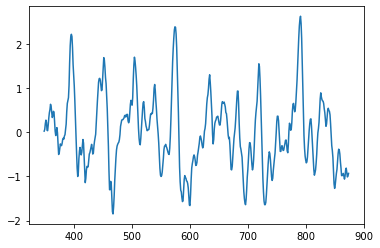

In [22]:
oni.ANOM.plot()

### set the season (string corresponding to the season in the ONI index)

In [23]:
dict_season = {}

dict_season['JFM'] = [1, 3]
dict_season['FMA'] = [2, 4]
dict_season['MAM'] = [3, 5]
dict_season['AMJ'] = [4, 6]
dict_season['MJJ'] = [5, 7]
dict_season['JJA'] = [6, 8]
dict_season['JAS'] = [7, 9]
dict_season['ASO'] = [8, 10]
dict_season['SON'] = [9, 11]
dict_season['OND'] = [10, 12]

In [24]:
# season = 'JFM'
# season = 'JJA'
season = 'OND'

### months spanned by the season

In [25]:
months = dict_season[season]

In [26]:
title = f"{month_abbr[months[0]]} - {month_abbr[months[1]]}"

In [27]:
title

'Oct - Dec'

### selects the Oceanic Nino Index seasonal values for the season 

In [28]:
oni_seas = oni.loc[oni.SEAS == season]

In [29]:
oni_seas.head()

,SEAS,YR,TOTAL,ANOM
358,OND,1979,26.98,0.52
370,OND,1980,26.57,0.11
382,OND,1981,26.37,-0.15
394,OND,1982,28.70,2.18
406,OND,1983,25.52,-1.00


### threshold used to define the ENSO events (NINO, NINA, NEUTRAL)

In [30]:
ONI_threshold = 0.5

In [31]:
ninos = oni_seas.query('ANOM > {}'.format(ONI_threshold))

In [32]:
ninas = oni_seas.query('ANOM < {}'.format(-ONI_threshold))

In [33]:
neutral = oni_seas.query(f'{-ONI_threshold} <= ANOM <= {ONI_threshold}')

In [34]:
ninos

,SEAS,YR,TOTAL,ANOM
358,OND,1979,26.98,0.52
394,OND,1982,28.70,2.18
442,OND,1986,27.64,1.14
454,OND,1987,27.76,1.25
502,OND,1991,27.91,1.21
538,OND,1994,27.71,1.01
574,OND,1997,29.02,2.40
634,OND,2002,28.03,1.31
658,OND,2004,27.38,0.66
682,OND,2006,27.62,0.94


In [35]:
len(ninos)

15

In [36]:
ninas

,SEAS,YR,TOTAL,ANOM
406,OND,1983,25.52,-1.00
418,OND,1984,25.61,-0.92
466,OND,1988,24.71,-1.80
550,OND,1995,25.70,-1.00
586,OND,1998,25.14,-1.48
598,OND,1999,25.16,-1.46
610,OND,2000,25.88,-0.75
670,OND,2005,26.15,-0.57
694,OND,2007,25.17,-1.50
706,OND,2008,26.12,-0.55


In [37]:
len(ninas)

17

In [38]:
neutral

,SEAS,YR,TOTAL,ANOM
370,OND,1980,26.57,0.11
382,OND,1981,26.37,-0.15
430,OND,1985,26.25,-0.27
478,OND,1989,26.34,-0.16
490,OND,1990,26.90,0.40
514,OND,1992,26.43,-0.28
526,OND,1993,26.75,0.04
562,OND,1996,26.17,-0.45
622,OND,2001,26.37,-0.35
646,OND,2003,27.07,0.35


In [39]:
len(neutral)

12

### Now reads the MSWEP monthly values

In [40]:
dpath_mswep = pathlib.Path('../data/MSWEP/monthly/') 

In [41]:
lfiles = list(dpath_mswep.glob("MSWEP_monthly_from_daily_????.nc"))

In [42]:
lfiles.sort()

In [43]:
lfiles[0]

PosixPath('../data/MSWEP/monthly/MSWEP_monthly_from_daily_1979.nc')

In [44]:
lfiles[-1]

PosixPath('../data/MSWEP/monthly/MSWEP_monthly_from_daily_2022.nc')

In [45]:
dset = xr.open_mfdataset(lfiles) 

In [46]:
dset 

<xarray.Dataset>
Dimensions:        (time: 528, lat: 800, lon: 1700)
Coordinates:
  * lon            (lon) float32 110.1 110.2 110.3 110.4 ... 279.8 279.9 280.0
  * lat            (lat) float32 -39.95 -39.85 -39.75 ... 39.75 39.85 39.95
  * time           (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2022-12-31
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(12, 800, 1700), meta=np.ndarray>
Attributes:
    history:  Created on 2021-02-03 20:47

### restrict the domain to [110.,-30.,280.,20.] for tthe sector plots

In [47]:
dset = dset.sel(lat=slice(-40., 30.), lon=slice(150, 360 - 90))

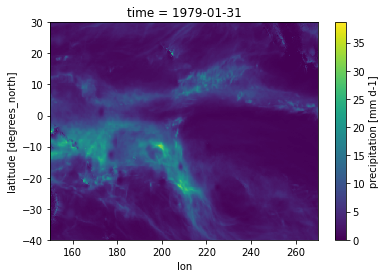

In [48]:
dset['precipitation'][0,:,:].plot()

### reads the climatology 

In [49]:
clim = xr.open_dataset('../data/MSWEP/monthly/climatology/Monthly_climatology_1991_2020.nc') 

### calculates the seasonal averages from the monthly means 

In [50]:
dset_seas = dset.rolling(time=3, min_periods=3).mean()

In [51]:
dset_seas

<xarray.Dataset>
Dimensions:        (lon: 1200, lat: 700, time: 528)
Coordinates:
  * lon            (lon) float32 150.1 150.2 150.3 150.4 ... 269.8 269.9 270.0
  * lat            (lat) float32 -39.95 -39.85 -39.75 ... 29.75 29.85 29.95
  * time           (time) datetime64[ns] 1979-01-31 1979-02-28 ... 2022-12-31
Data variables:
    precipitation  (time, lat, lon) float32 dask.array<chunksize=(14, 700, 1200), meta=np.ndarray>
Attributes:
    history:  Created on 2021-02-03 20:47

In [52]:
dset_seas = dset_seas.sel(time=(dset_seas.time.dt.month == months[1]))

In [53]:
from datetime import datetime

In [54]:
time_index_ninos = [datetime(y, months[1], 1) for y in ninos.YR.values]
time_index_ninas = [datetime(y, months[1], 1) for y in ninas.YR.values]
time_index_neutral = [datetime(y, months[1], 1) for y in neutral.YR.values]

In [55]:
time_index_ninos

[datetime.datetime(1979, 12, 1, 0, 0),
 datetime.datetime(1982, 12, 1, 0, 0),
 datetime.datetime(1986, 12, 1, 0, 0),
 datetime.datetime(1987, 12, 1, 0, 0),
 datetime.datetime(1991, 12, 1, 0, 0),
 datetime.datetime(1994, 12, 1, 0, 0),
 datetime.datetime(1997, 12, 1, 0, 0),
 datetime.datetime(2002, 12, 1, 0, 0),
 datetime.datetime(2004, 12, 1, 0, 0),
 datetime.datetime(2006, 12, 1, 0, 0),
 datetime.datetime(2009, 12, 1, 0, 0),
 datetime.datetime(2014, 12, 1, 0, 0),
 datetime.datetime(2015, 12, 1, 0, 0),
 datetime.datetime(2018, 12, 1, 0, 0),
 datetime.datetime(2019, 12, 1, 0, 0)]

In [56]:
dset_seas['time'] = dset_seas.time.to_index() - pd.offsets.MonthBegin()

In [57]:
ninos_cmorph = dset_seas.sel(time=time_index_ninos)

In [58]:
ninas_cmorph = dset_seas.sel(time=time_index_ninas)

In [59]:
time_index_neutral

[datetime.datetime(1980, 12, 1, 0, 0),
 datetime.datetime(1981, 12, 1, 0, 0),
 datetime.datetime(1985, 12, 1, 0, 0),
 datetime.datetime(1989, 12, 1, 0, 0),
 datetime.datetime(1990, 12, 1, 0, 0),
 datetime.datetime(1992, 12, 1, 0, 0),
 datetime.datetime(1993, 12, 1, 0, 0),
 datetime.datetime(1996, 12, 1, 0, 0),
 datetime.datetime(2001, 12, 1, 0, 0),
 datetime.datetime(2003, 12, 1, 0, 0),
 datetime.datetime(2012, 12, 1, 0, 0),
 datetime.datetime(2013, 12, 1, 0, 0)]

In [60]:
time_index_neutral

[datetime.datetime(1980, 12, 1, 0, 0),
 datetime.datetime(1981, 12, 1, 0, 0),
 datetime.datetime(1985, 12, 1, 0, 0),
 datetime.datetime(1989, 12, 1, 0, 0),
 datetime.datetime(1990, 12, 1, 0, 0),
 datetime.datetime(1992, 12, 1, 0, 0),
 datetime.datetime(1993, 12, 1, 0, 0),
 datetime.datetime(1996, 12, 1, 0, 0),
 datetime.datetime(2001, 12, 1, 0, 0),
 datetime.datetime(2003, 12, 1, 0, 0),
 datetime.datetime(2012, 12, 1, 0, 0),
 datetime.datetime(2013, 12, 1, 0, 0)]

In [61]:
neutral_cmorph = dset_seas.sel(time=time_index_neutral)

In [62]:
lon_sectors = [150, 180, (360-150), (360-120), (360-90)]

lon_labels = [u'150\u00B0E',u'180\u00B0E',u'150\u00B0W',u'120\u00B0W',u'90\u00B0W']

In [63]:
year = 2022

150°E - 180°E
180°E - 150°W
150°W - 120°W
120°W - 90°W


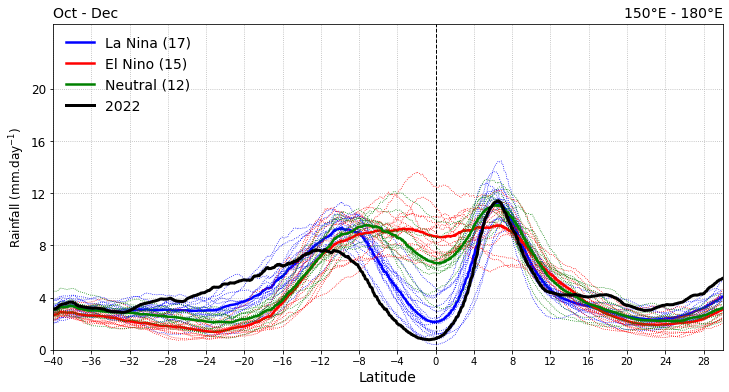

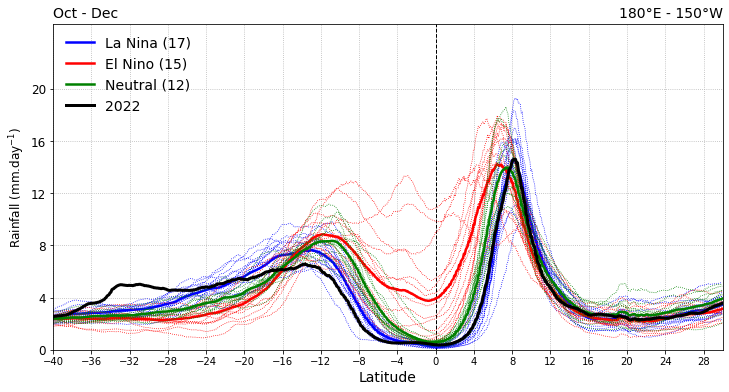

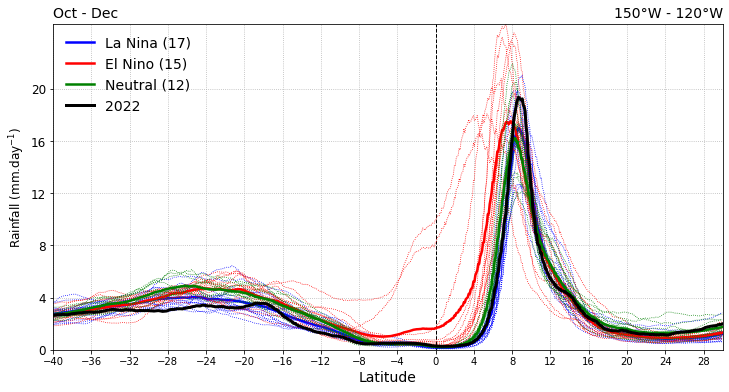

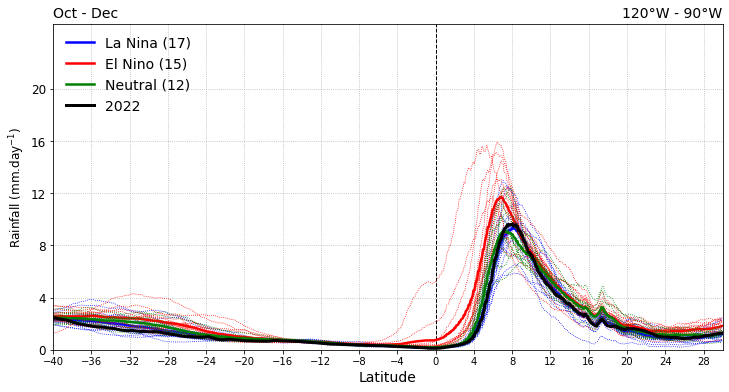

In [64]:
for i in range(4): 
    
#     label_sector = f"{lon_sectors[i]}E - {lon_sectors[i+1]}E"
    label_sector = f"{lon_labels[i]} - {lon_labels[i+1]}" 
    
    print(label_sector)
    
    sector_seas_ninos = ninos_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')
    sector_seas_ninas = ninas_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')
    sector_seas_neutral = neutral_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')
    
    last_year = dset_seas.sel(time=f"{year}-{months[1]}")

    last_year = last_year.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

    sector_seas_ninos = sector_seas_ninos.to_dataframe().unstack()

    sector_seas_ninas = sector_seas_ninas.to_dataframe().unstack()

    sector_seas_neutral = sector_seas_neutral.to_dataframe().unstack()

    last_year = last_year.to_dataframe()

    last_year = last_year.loc[:,'precipitation']

    last_year.index = last_year.index.droplevel(1)

    f, ax = plt.subplots(figsize=(12,6))

    ax.axvline(0, lw=1, color='k', ls='--')

    sector_seas_ninas.plot(ax=ax, color='b', legend=None, ls=':', lw=0.8)
    LN, = ax.plot(sector_seas_ninas.index, sector_seas_ninas.mean(axis=1), color='b', lw=2.5)

    sector_seas_ninos.plot(ax=ax, color='r', legend=None, ls=':', lw=0.8)
    EN, = ax.plot(sector_seas_ninos.index, sector_seas_ninos.mean(axis=1), color='r', lw=2.5)

    sector_seas_neutral.plot(ax=ax, color='g', legend=None, ls=':', lw=0.8)
    N, = ax.plot(sector_seas_neutral.index, sector_seas_neutral.mean(axis=1), color='g', lw=2.5)

    LY, = ax.plot(last_year.index, last_year, color='k', lw=3)

    ax.legend([LN, EN, N, LY], [f'La Nina ({len(ninas)})', f'El Nino ({len(ninos)})', f'Neutral ({len(neutral)})', str(year)], fontsize=14, loc=2, frameon=False )

    ax.set_xticks(np.arange(-40, 30 + 4, 4))
#     ax.set_xticklabels([u'40\u00B0S',u'30\u00B0S',u'20\u00B0S',u'10\u00B0S','Equ.',u'10\u00B0N',u'20\u00B0N',u'30\u00B0N'], fontsize=12); 
    ax.set_xlabel('Latitude', fontsize=14)

    ax.set_yticks(np.arange(0, 22, 4)); 
    ax.set_yticklabels(np.arange(0, 22, 4), fontsize=12); 
    ax.set_ylabel("Rainfall (mm.day$^{-1}$)", fontsize=12); 
    
    ax.set_xlim(-40, 30)

    ax.set_ylim(0, 25)

    ax.grid(ls=':')

    ax.set_title(title, loc='left', fontsize=14)

    ax.set_title(label_sector, loc='right', fontsize=14)

    f.savefig(f'../figures/MSWEP_comparison_last_year_ENSOs_{season}_{label_sector.replace(" ","")}_CMAP.png', dpi=400, facecolor='w')
    f.savefig(f'../figures/MSWEP_comparison_last_year_ENSOs_{season}_{label_sector.replace(" ","")}_CMAP.pdf', facecolor='w')